In [116]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
#importing necessary liabraries

In [117]:
bike=pd.read_csv(r"C:\My files\Study\IIIT_Bangalore\C47\Linear_Regression\Assignment\Boom_bike\day.csv")
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
bike.info()
#checing data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [119]:
print("shape:\n ",bike.shape)
print("size\n ",bike.size)

shape:
  (730, 16)
size
  11680


In [120]:
bike.describe() #descriptive statistics

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [121]:
bike.columns #checking columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [122]:
bike.isnull().sum() # checking for null values ,fortunately we dont have any null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [123]:
#checking for dupliacte values fortunately we dont have any duplicate values
bike_dup=bike.copy()
bike_dup.drop_duplicates(inplace=True)
bike_dup.shape

(730, 16)

# Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation


In [124]:
#from the given data we can see that instant is an index column so we drop it
bike.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [125]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [126]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# Performing EDA
1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

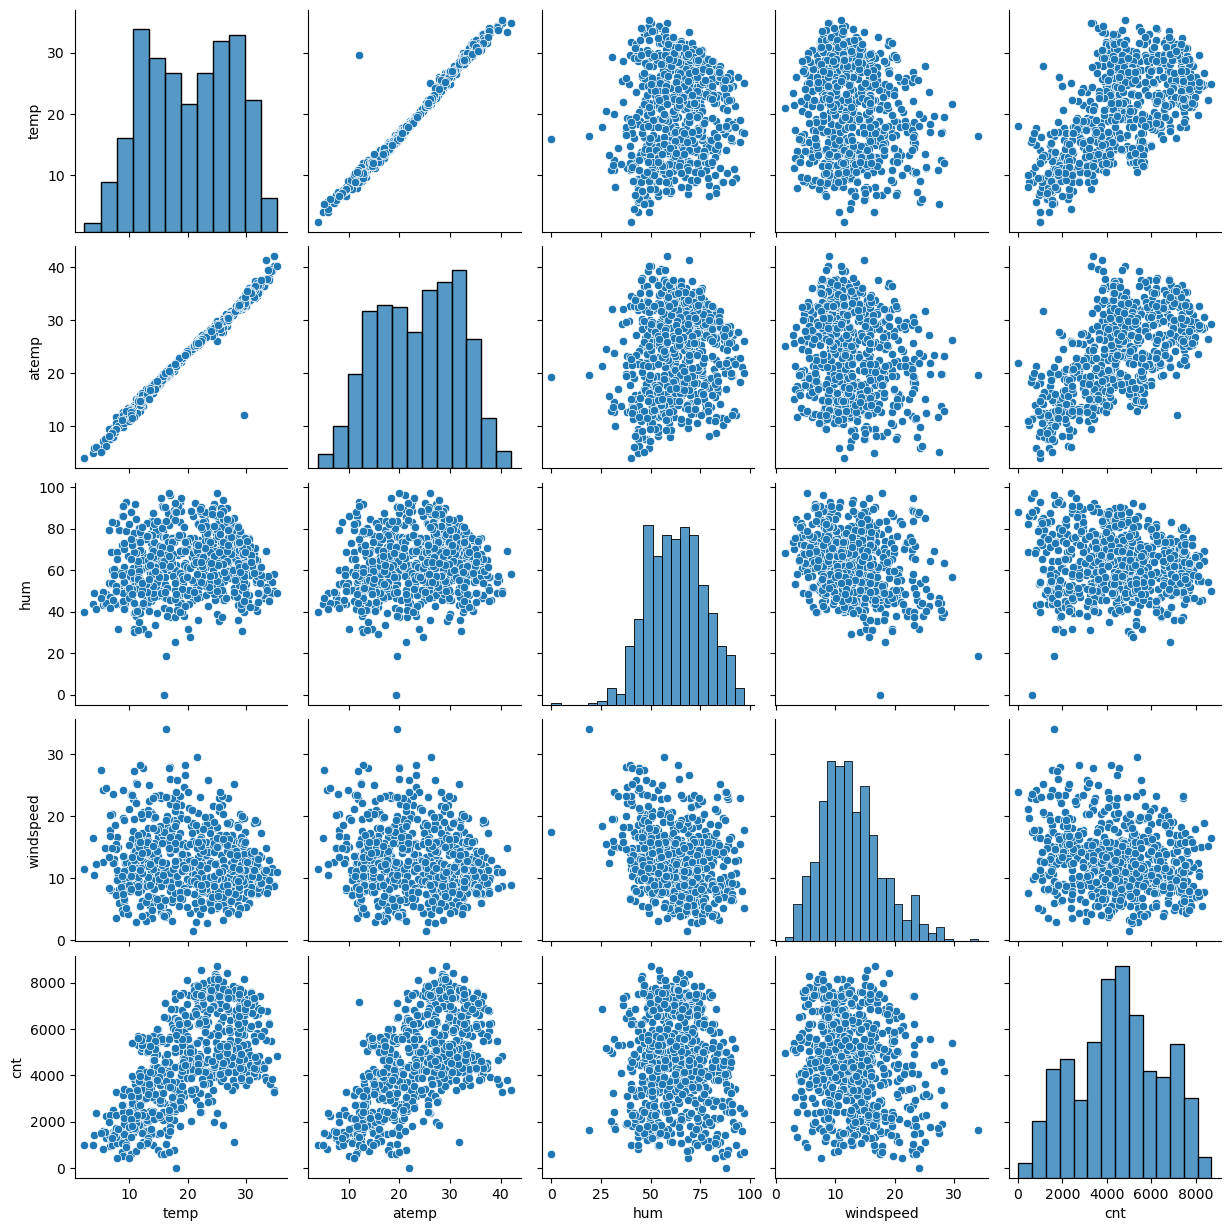

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

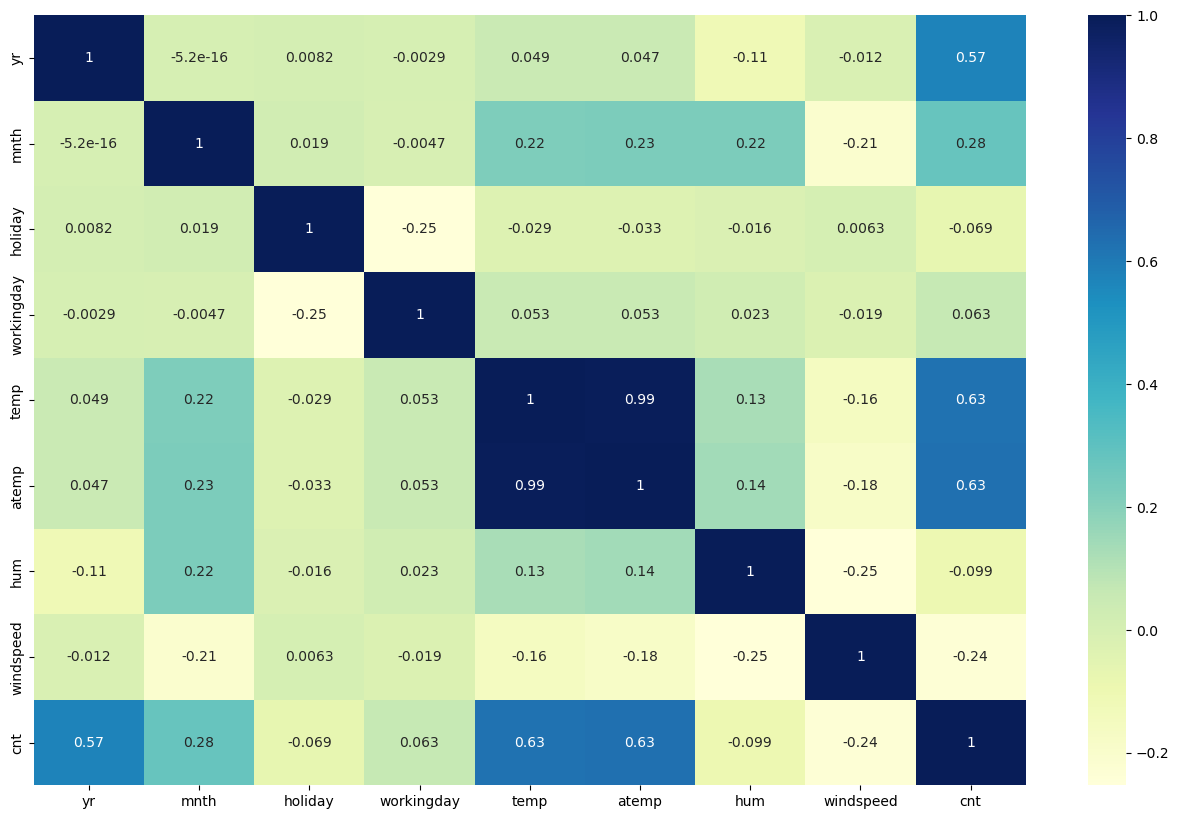

In [128]:


# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()


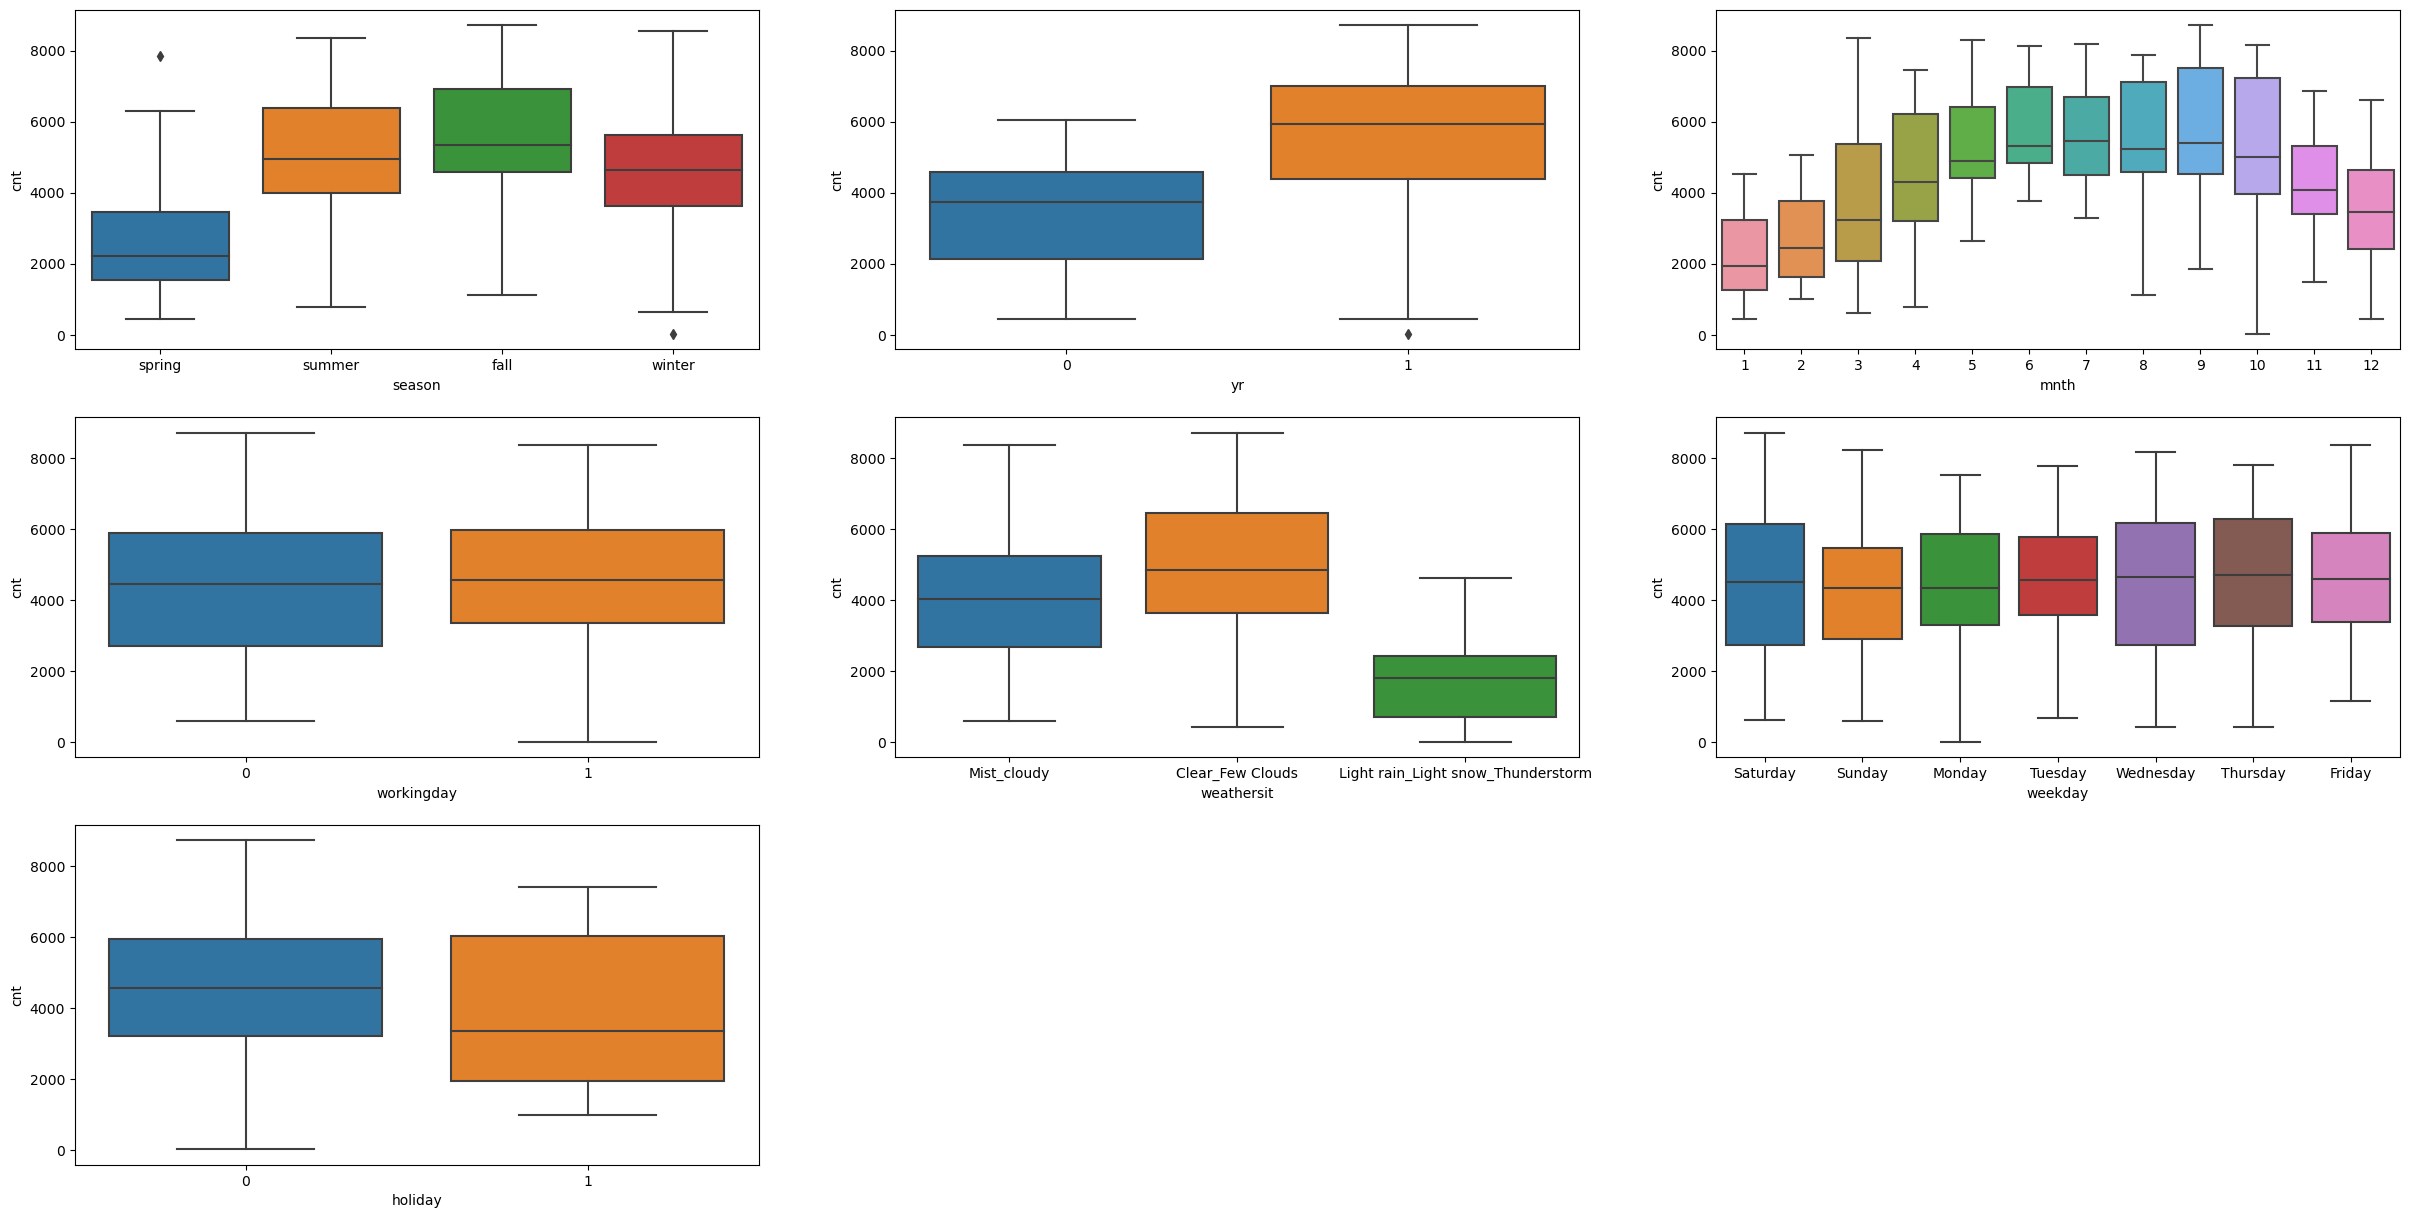

In [129]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

# Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

Before creating dummy variables, we will have to convert them into 'category' data types.

In [130]:
bike[['mnth','season','weathersit','weekday']]=bike[['mnth','season','weathersit','weekday']].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [131]:
cat_col = ['season','mnth','weekday','weathersit']
bike = pd.get_dummies(bike,columns=cat_col,drop_first=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   temp                                           730 non-null    float64
 4   atemp                                          730 non-null    float64
 5   hum                                            730 non-null    float64
 6   windspeed                                      730 non-null    float64
 7   cnt                                            730 non-null    int64  
 8   season_spring                                  730 non-null    uint8  
 9   season_summer                                  730 non

In [133]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 42)

In [134]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [135]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [136]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,1,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,1,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,0,0,1,0,1


In [137]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,...,0.092157,0.074510,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216,0.029412,0.345098
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,...,0.289531,0.262857,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [139]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,1,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,1,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [140]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [142]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [143]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 4),
 ('mnth_4', False, 11),
 ('mnth_5', False, 5),
 ('mnth_6', False, 10),
 ('mnth_7', True, 1),
 ('mnth_8', False, 9),
 ('mnth_9', False, 2),
 ('mnth_10', False, 6),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [144]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [145]:

X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [146]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [147]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [148]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [149]:

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.27e-185
Time:                        22:59:38   Log-Likelihood:                 481.75
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     495   BIC:                            -870.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.80
12,weekday_Sunday,12.41
11,weekday_Saturday,12.03
3,atemp,3.56
1,holiday,3.05
6,season_spring,2.89
7,season_winter,2.18
4,hum,1.86
9,mnth_11,1.71
14,weathersit_Mist_cloudy,1.57


# Model 2

In [151]:
#Removing the variable 'workingday' based on its High p-value & High VIF
X_train_new2 = X_train_rfe.drop(["workingday"], axis = 1)

In [152]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.27e-185
Time:                        22:59:38   Log-Likelihood:                 481.75
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     495   BIC:                            -870.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.22
2,atemp,17.35
4,windspeed,5.06
6,season_winter,2.72
5,season_spring,2.64
13,weathersit_Mist_cloudy,2.24
0,yr,2.09
8,mnth_11,1.81
7,mnth_7,1.43
9,mnth_12,1.35


# Model 3
Removing the variable 'hum' based on its Very High 'VIF' value.
Even though the VIF of hum is  highest, we decided to drop 'hum' .

In [154]:
X_train_new3 = X_train_new2.drop(["hum"], axis = 1)

# VIF

In [155]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,windspeed,5.03
2,atemp,4.98
5,season_winter,2.39
0,yr,2.09
7,mnth_11,1.77
4,season_spring,1.74
12,weathersit_Mist_cloudy,1.56
6,mnth_7,1.37
8,mnth_12,1.31
10,weekday_Sunday,1.23


In [156]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const                                            0.254124
yr                                               0.243227
holiday                                         -0.081691
atemp                                            0.442544
windspeed                                       -0.088490
season_spring                                   -0.156580
season_winter                                    0.083990
mnth_7                                          -0.061852
mnth_11                                         -0.091575
mnth_12                                         -0.078596
weekday_Saturday                                 0.004646
weekday_Sunday                                  -0.041847
weathersit_Light rain_Light snow_Thunderstorm   -0.267205
weathersit_Mist_cloudy                          -0.081794
dtype: float64

In [157]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          2.46e-183
Time:                        22:59:38   Log-Likelihood:                 474.53
No. Observations:                 510   AIC:                            -921.1
Df Residuals:                     496   BIC:                            -861.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

# Model 4
Removing the variable weekday_Saturday based on its Very High P- value.


In [158]:
X_train_new4 = X_train_new3.drop(["weekday_Saturday"], axis = 1)

 VIF Check

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.96
2,atemp,4.94
5,season_winter,2.38
0,yr,2.09
7,mnth_11,1.77
4,season_spring,1.74
11,weathersit_Mist_cloudy,1.56
6,mnth_7,1.37
8,mnth_12,1.31
9,weekday_Sunday,1.20


In [160]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [161]:
# Check the parameters obtained

lr4.params

const                                            0.255495
yr                                               0.243249
holiday                                         -0.082563
atemp                                            0.441529
windspeed                                       -0.088149
season_spring                                   -0.156953
season_winter                                    0.083822
mnth_7                                          -0.061762
mnth_11                                         -0.091570
mnth_12                                         -0.078473
weekday_Sunday                                  -0.042727
weathersit_Light rain_Light snow_Thunderstorm   -0.266936
weathersit_Mist_cloudy                          -0.081875
dtype: float64

In [162]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.80e-184
Time:                        22:59:38   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -922.9
Df Residuals:                     497   BIC:                            -867.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [163]:
X_train_new4.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_7,mnth_11,mnth_12,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
683,1,0,0.322150,0.327101,0,1,0,1,0,0,0,1
645,1,1,0.404998,0.419004,0,1,0,0,0,0,0,1
163,0,0,0.685963,0.708724,0,0,0,0,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0,1,0,0,1
640,1,0,0.682653,0.110593,0,1,0,0,0,0,0,1


In [164]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [165]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_new4['mnth_2']=X_train['mnth_2']
X_train_new4.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_7,mnth_11,mnth_12,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,mnth_2
683,1,0,0.322150,0.327101,0,1,0,1,0,0,0,1,0
645,1,1,0.404998,0.419004,0,1,0,0,0,0,0,1,0
163,0,0,0.685963,0.708724,0,0,0,0,0,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0,1,0,0,1,0
640,1,0,0.682653,0.110593,0,1,0,0,0,0,0,1,0


In [166]:
# High p- value for mnth2 so we drop it
X_train_new4=X_train_new4.drop(['mnth_2'],axis=1)

In [167]:
X_train_new4.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_7,mnth_11,mnth_12,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
683,1,0,0.322150,0.327101,0,1,0,1,0,0,0,1
645,1,1,0.404998,0.419004,0,1,0,0,0,0,0,1
163,0,0,0.685963,0.708724,0,0,0,0,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0,1,0,0,1
640,1,0,0.682653,0.110593,0,1,0,0,0,0,0,1


# Model 6- Adding variable season_summer

In [168]:
X_train_new4['season_summer']=X_train['season_summer']

In [169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.61
2,atemp,5.30
5,season_winter,2.87
12,season_summer,2.20
4,season_spring,2.13
0,yr,2.10
7,mnth_11,1.77
6,mnth_7,1.62
11,weathersit_Mist_cloudy,1.58
8,mnth_12,1.31


In [170]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [171]:
# Check the parameters obtained

lr5.params

const                                            0.254266
yr                                               0.243243
holiday                                         -0.082578
atemp                                            0.442539
windspeed                                       -0.088263
season_spring                                   -0.155955
season_winter                                    0.084570
mnth_7                                          -0.061309
mnth_11                                         -0.091417
mnth_12                                         -0.078368
weekday_Sunday                                  -0.042730
weathersit_Light rain_Light snow_Thunderstorm   -0.266882
weathersit_Mist_cloudy                          -0.081891
season_summer                                    0.001051
dtype: float64

In [172]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          2.64e-183
Time:                        22:59:38   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -920.9
Df Residuals:                     496   BIC:                            -861.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [173]:
# High p- value for season_summer so we drop it
X_train_new4=X_train_new4.drop(['season_summer'],axis=1)

# Model 7- Adding variable mnth_3

In [174]:
X_train_new4['mnth_3']=X_train['mnth_3']

In [175]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [176]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.08e-184
Time:                        22:59:38   Log-Likelihood:                 477.76
No. Observations:                 510   AIC:                            -927.5
Df Residuals:                     496   BIC:                            -868.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.96
3,windspeed,4.96
5,season_winter,2.39
0,yr,2.09
4,season_spring,1.83
7,mnth_11,1.77
11,weathersit_Mist_cloudy,1.57
6,mnth_7,1.37
8,mnth_12,1.32
9,weekday_Sunday,1.20


# Model 8- Adding variable mnth_4

In [178]:
X_train_new4['mnth_4']=X_train['mnth_4']

In [179]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [180]:
# Check the parameters obtained

lr5.params

const                                            0.265082
yr                                               0.242906
holiday                                         -0.078124
atemp                                            0.426483
windspeed                                       -0.082001
season_spring                                   -0.172521
season_winter                                    0.079883
mnth_7                                          -0.060848
mnth_11                                         -0.093541
mnth_12                                         -0.075798
weekday_Sunday                                  -0.041994
weathersit_Light rain_Light snow_Thunderstorm   -0.271813
weathersit_Mist_cloudy                          -0.083842
mnth_3                                           0.044816
mnth_4                                          -0.020951
dtype: float64

In [181]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          7.98e-184
Time:                        22:59:39   Log-Likelihood:                 478.44
No. Observations:                 510   AIC:                            -926.9
Df Residuals:                     495   BIC:                            -863.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [182]:
# High p- value for mnth_4 so we drop it
X_train_new4=X_train_new4.drop(['mnth_4'],axis=1)

# Model 9- Adding variable mnth_5

In [183]:
X_train_new4['mnth_5']=X_train['mnth_5']

In [184]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.247387
yr                                               0.242709
holiday                                         -0.078920
atemp                                            0.444921
windspeed                                       -0.085286
season_spring                                   -0.159034
season_winter                                    0.089160
mnth_7                                          -0.056830
mnth_11                                         -0.090593
mnth_12                                         -0.073624
weekday_Sunday                                  -0.042190
weathersit_Light rain_Light snow_Thunderstorm   -0.271002
weathersit_Mist_cloudy                          -0.083935
mnth_3                                           0.048088
mnth_5                                           0.013928
dtype: float64

In [185]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.05e-183
Time:                        22:59:39   Log-Likelihood:                 478.15
No. Observations:                 510   AIC:                            -926.3
Df Residuals:                     495   BIC:                            -862.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [186]:
# High p- value for mnth_5 so we drop it
X_train_new4=X_train_new4.drop(['mnth_5'],axis=1)

# Model 10- Adding variable mnth_6

In [187]:
X_train_new4['mnth_6']=X_train['mnth_6']

In [188]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.250491
yr                                               0.242675
holiday                                         -0.079042
atemp                                            0.447140
windspeed                                       -0.085889
season_spring                                   -0.162139
season_winter                                    0.085180
mnth_7                                          -0.061476
mnth_11                                         -0.090280
mnth_12                                         -0.073547
weekday_Sunday                                  -0.042459
weathersit_Light rain_Light snow_Thunderstorm   -0.271693
weathersit_Mist_cloudy                          -0.083757
mnth_3                                           0.046299
mnth_6                                          -0.005865
dtype: float64

In [189]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.45e-183
Time:                        22:59:39   Log-Likelihood:                 477.82
No. Observations:                 510   AIC:                            -925.6
Df Residuals:                     495   BIC:                            -862.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [190]:
# High p- value for mnth_6 so we drop it
X_train_new4=X_train_new4.drop(['mnth_6'],axis=1)

# Model 11- Adding variable mnth_8

In [191]:
X_train_new4['mnth_8']=X_train['mnth_8']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.244883
yr                                               0.242222
holiday                                         -0.080378
atemp                                            0.466362
windspeed                                       -0.087579
season_spring                                   -0.160796
season_winter                                    0.081428
mnth_7                                          -0.070796
mnth_11                                         -0.087375
mnth_12                                         -0.071705
weekday_Sunday                                  -0.041780
weathersit_Light rain_Light snow_Thunderstorm   -0.271198
weathersit_Mist_cloudy                          -0.083575
mnth_3                                           0.043942
mnth_8                                          -0.040074
dtype: float64

In [192]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.27e-184
Time:                        22:59:39   Log-Likelihood:                 480.34
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     495   BIC:                            -867.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [193]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.77
3,windspeed,5.00
5,season_winter,2.48
0,yr,2.09
4,season_spring,1.84
7,mnth_11,1.78
11,weathersit_Mist_cloudy,1.57
6,mnth_7,1.48
8,mnth_12,1.32
13,mnth_8,1.31


# model 12-Adding variable mnth_9

In [194]:
X_train_new4['mnth_9']=X_train['mnth_9']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.247567
yr                                               0.241765
holiday                                         -0.080746
atemp                                            0.445148
windspeed                                       -0.082559
season_spring                                   -0.160390
season_winter                                    0.080514
mnth_7                                          -0.057360
mnth_11                                         -0.082532
mnth_12                                         -0.068048
weekday_Sunday                                  -0.042958
weathersit_Light rain_Light snow_Thunderstorm   -0.273327
weathersit_Mist_cloudy                          -0.084238
mnth_3                                           0.048373
mnth_8                                          -0.028049
mnth_9                                           0.045821
dtype: float64

In [195]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.06e-185
Time:                        22:59:39   Log-Likelihood:                 484.54
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     494   BIC:                            -869.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [196]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.50
3,windspeed,5.05
5,season_winter,2.48
0,yr,2.09
4,season_spring,1.84
7,mnth_11,1.79
6,mnth_7,1.59
11,weathersit_Mist_cloudy,1.57
13,mnth_8,1.38
8,mnth_12,1.33


In [197]:
# as adding mnth_9 impacted mnth_8's p-value so we have to drop mnth_9 
X_train_new4=X_train_new4.drop(['mnth_9'],axis=1)

# model 13-Adding variable mnth_10

In [198]:
X_train_new4['mnth_10']=X_train['mnth_10']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.244366
yr                                               0.242286
holiday                                         -0.079083
atemp                                            0.466824
windspeed                                       -0.087118
season_spring                                   -0.159767
season_winter                                    0.092062
mnth_7                                          -0.070890
mnth_11                                         -0.097948
mnth_12                                         -0.078517
weekday_Sunday                                  -0.041875
weathersit_Light rain_Light snow_Thunderstorm   -0.270455
weathersit_Mist_cloudy                          -0.083547
mnth_3                                           0.043345
mnth_8                                          -0.040105
mnth_10                                         -0.015295
dtype: float64

In [199]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.46e-183
Time:                        22:59:39   Log-Likelihood:                 480.52
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     494   BIC:                            -861.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [200]:
#Mnth_10 gives high p value
X_train_new4=X_train_new4.drop(['mnth_10'],axis=1)

# model 13-Adding variable weekday_Monday

In [201]:
X_train_new4['weekday_Monday']=X_train['weekday_Monday']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.246395
yr                                               0.242497
holiday                                         -0.071355
atemp                                            0.466855
windspeed                                       -0.086884
season_spring                                   -0.160672
season_winter                                    0.081537
mnth_7                                          -0.070804
mnth_11                                         -0.087848
mnth_12                                         -0.071754
weekday_Sunday                                  -0.044047
weathersit_Light rain_Light snow_Thunderstorm   -0.273196
weathersit_Mist_cloudy                          -0.083268
mnth_3                                           0.043379
mnth_8                                          -0.039891
weekday_Monday                                  -0.014337
dtype: float64

In [202]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          9.28e-184
Time:                        22:59:39   Log-Likelihood:                 481.00
No. Observations:                 510   AIC:                            -930.0
Df Residuals:                     494   BIC:                            -862.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [203]:
# as adding weekday_Monday gives high p-value so we have to dropweekday_Monday
X_train_new4=X_train_new4.drop(['weekday_Monday'],axis=1)

# model 14-Adding variable weekday_Tuesday

In [204]:
X_train_new4['weekday_Tuesday']=X_train['weekday_Tuesday']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.246909
yr                                               0.241703
holiday                                         -0.082155
atemp                                            0.468293
windspeed                                       -0.086785
season_spring                                   -0.160325
season_winter                                    0.081262
mnth_7                                          -0.070699
mnth_11                                         -0.086880
mnth_12                                         -0.071370
weekday_Sunday                                  -0.045141
weathersit_Light rain_Light snow_Thunderstorm   -0.269930
weathersit_Mist_cloudy                          -0.082949
mnth_3                                           0.044288
mnth_8                                          -0.041673
weekday_Tuesday                                 -0.021631
dtype: float64

In [205]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          4.20e-184
Time:                        22:59:39   Log-Likelihood:                 481.82
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     494   BIC:                            -863.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [206]:
# as adding weekday_Tuesday gives high p-value so we have to drop weekday_Tuesday
X_train_new4=X_train_new4.drop(['weekday_Tuesday'],axis=1)

# model 15-Adding variable weekday_Wednesday

In [207]:
X_train_new4['weekday_Wednesday']=X_train['weekday_Wednesday']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.244187
yr                                               0.242321
holiday                                         -0.079795
atemp                                            0.466151
windspeed                                       -0.087184
season_spring                                   -0.160871
season_winter                                    0.081370
mnth_7                                          -0.070794
mnth_11                                         -0.087264
mnth_12                                         -0.071683
weekday_Sunday                                  -0.041182
weathersit_Light rain_Light snow_Thunderstorm   -0.271885
weathersit_Mist_cloudy                          -0.083480
mnth_3                                           0.043759
mnth_8                                          -0.040204
weekday_Wednesday                                0.003687
dtype: float64

In [208]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.67e-183
Time:                        22:59:39   Log-Likelihood:                 480.38
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     494   BIC:                            -861.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [209]:
# as adding weekday_Wednesday gives high p-value so we have to dropweekday_Wednesday
X_train_new4=X_train_new4.drop(['weekday_Wednesday'],axis=1)

# model 16-Adding variable weekday_Thursday

In [210]:
X_train_new4['weekday_Thursday']=X_train['weekday_Thursday']
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.243367
yr                                               0.242237
holiday                                         -0.079272
atemp                                            0.465770
windspeed                                       -0.087708
season_spring                                   -0.160815
season_winter                                    0.081157
mnth_7                                          -0.070535
mnth_11                                         -0.087553
mnth_12                                         -0.072001
weekday_Sunday                                  -0.039889
weathersit_Light rain_Light snow_Thunderstorm   -0.270682
weathersit_Mist_cloudy                          -0.083315
mnth_3                                           0.043299
mnth_8                                          -0.040102
weekday_Thursday                                 0.010740
dtype: float64

In [211]:
# Print a summary of the linear regression model obtained
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.19e-183
Time:                        22:59:39   Log-Likelihood:                 480.74
No. Observations:                 510   AIC:                            -929.5
Df Residuals:                     494   BIC:                            -861.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [212]:
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Check the parameters obtained

lr5.params

const                                            0.243367
yr                                               0.242237
holiday                                         -0.079272
atemp                                            0.465770
windspeed                                       -0.087708
season_spring                                   -0.160815
season_winter                                    0.081157
mnth_7                                          -0.070535
mnth_11                                         -0.087553
mnth_12                                         -0.072001
weekday_Sunday                                  -0.039889
weathersit_Light rain_Light snow_Thunderstorm   -0.270682
weathersit_Mist_cloudy                          -0.083315
mnth_3                                           0.043299
mnth_8                                          -0.040102
weekday_Thursday                                 0.010740
dtype: float64

In [213]:
# as adding weekday_Thurssday gives high p-value so we have to drop weekday_Thursday
X_train_new4=X_train_new4.drop(['weekday_Thursday'],axis=1)

In [214]:
X_train_new4.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_7,mnth_11,mnth_12,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,mnth_3,mnth_8
683,1,0,0.322150,0.327101,0,1,0,1,0,0,0,1,0,0
645,1,1,0.404998,0.419004,0,1,0,0,0,0,0,1,0,0
163,0,0,0.685963,0.708724,0,0,0,0,0,0,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0,1,0,0,1,0,0
640,1,0,0.682653,0.110593,0,1,0,0,0,0,0,1,0,0


# Insights
This model 14 looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

In [215]:
#Predict values
y_train_cnt = lr5.predict(X_train_lm5)

In [216]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

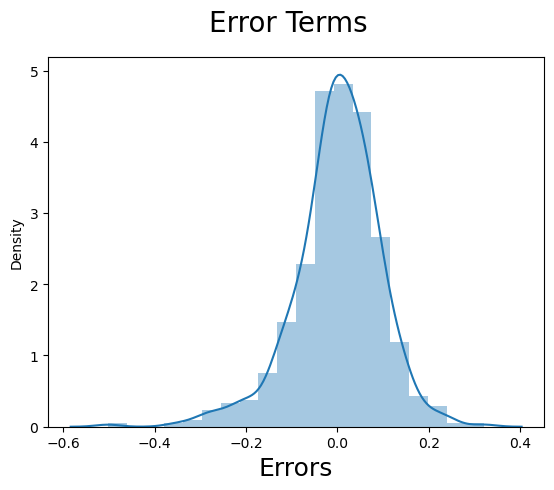

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [218]:
#Checking columns
X_train_lm5.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_7', 'mnth_11', 'mnth_12', 'weekday_Sunday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'mnth_3', 'mnth_8', 'weekday_Thursday'],
      dtype='object')

In [219]:
print(X_train_lm5.shape)
print(res.shape)

(510, 16)
(510,)


In [220]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [221]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [222]:
X_train_new=X_train_lm5.drop(['const'], axis=1)

In [223]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [224]:
#Making predictions on the chosen model

y_pred = lr5.predict(X_test_new)


Text(0, 0.5, 'y_pred')

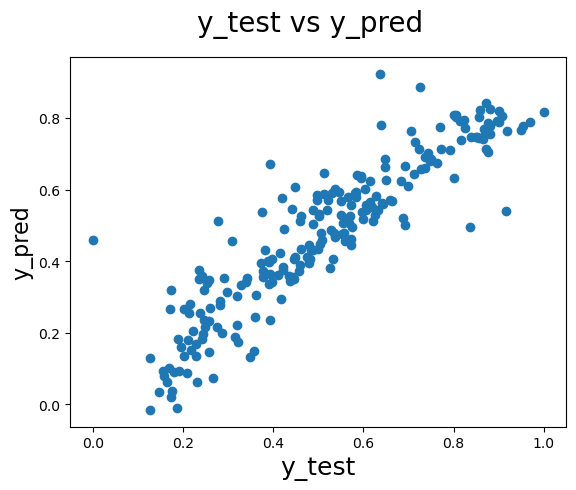

In [225]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [226]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7904278029481238

# R2 Value of model is 78.79~79% 

In [227]:
X_t=X_train_new.iloc[:,0].values


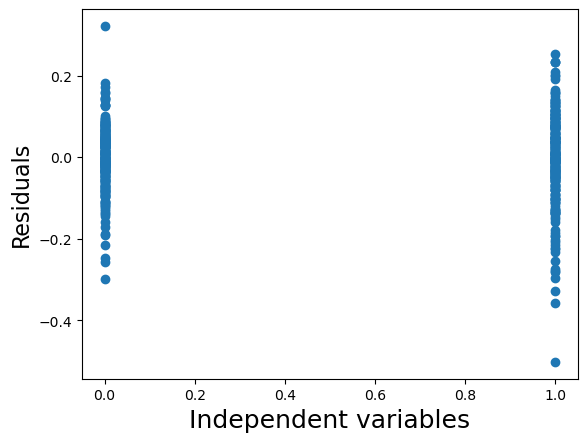

In [228]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

# When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [229]:

X_train_new.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_7,mnth_11,mnth_12,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,mnth_3,mnth_8,weekday_Thursday
683,1,0,0.322150,0.327101,0,1,0,1,0,0,0,1,0,0,1
645,1,1,0.404998,0.419004,0,1,0,0,0,0,0,1,0,0,0
163,0,0,0.685963,0.708724,0,0,0,0,0,0,0,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0,1,0,0,1,0,0,0
640,1,0,0.682653,0.110593,0,1,0,0,0,0,0,1,0,0,0


In [230]:
print(X_train_lm5.columns)
print(lr5.summary())

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_7', 'mnth_11', 'mnth_12', 'weekday_Sunday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'mnth_3', 'mnth_8', 'weekday_Thursday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.19e-183
Time:                        22:59:40   Log-Likelihood:                 480.74
No. Observations:                 510   AIC:                            -929.5
Df Residuals:                     494   BIC:                            -861.7
Df Model:                          15                                 

# We can see that the equation for best fitted line is:
cnt= 0.2458 X yr - 0.0813 X holiday + 0.4678 X atemp - -0.0869 X windspeed  - -0.1604 X season_spring   +0.0811  X season_winter  - 0.0705 X mnth_7 - 0.0870  X mnth_11 - 0.0716   X mnth_12 - 0.0437 X weekday_Sunday - 0.2697  X weathersit_Light rain_Light snow_Thunderstorm - 0.0828  X weathersit_Mist_cloudy  + 0.0439 X mnth_3 - 0.0416 X mnth_8 - -0.0202 X  weekday_Tuesday 

# We can see the demand for bikes depends mainly on below variables:

'yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_7', 'mnth_11', 'mnth_12', 'weekday_Sunday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'mnth_3', 'mnth_8', 'weekday_Tuesday

# Month_wise_demand
Demand increases in the month of 3, yr only
Demand increases in the month of   7 , 8,11,12 
# Atmosphere_wise_Demand  
 Demand decreases if there is windspeed , sping_season ,weathersit_Light rain_Light snow_Thunderstorm , weathersit_Mist_cloudy 
# Day_wise_Demand
Demand decreses at sunday,tuesday and if it is holiday
